# Pet Adoption - Classification

Steps:
1. Import Libraries
2. Import Dataset
3. Exploratory data analysis
4. Splitting Data
5. Imputation
6. Feature Engineering
7. Standardization
8. Encoding
9. Feature Selection
10. Synthetic Sampling
11. Model Selection and Hyperparameter tuning

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report

## 2. Import Dataset

In [2]:
# Read CSV
pet_adoption = pd.read_csv('Resources/pet_adoption_data.csv')
# View the dataframe
pet_adoption.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [3]:
# Reset the index
pet_adoption.drop(columns='PetID', inplace=True)
# View the dataframe
pet_adoption

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


## 3. Exploratory data analysis

In [4]:
# Check for null values
pet_adoption.isnull().sum()

PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [5]:
# Use describe function to see the statistics
pet_adoption.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


## 4. Splitting Data

In [6]:
# Setup X and y variables
X = pet_adoption.drop(columns='AdoptionLikelihood')
y = pet_adoption['AdoptionLikelihood'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)
X_train.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,91.847841,15.730955,0.691694,0.193355,44.019934,250.399336,0.305648
std,52.525438,8.277922,0.461947,0.395061,25.602181,143.642099,0.460834
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,8.879518,0.000000,0.000000,21.000000,128.000000,0.000000
50%,94.000000,15.919121,1.000000,0.000000,45.000000,245.000000,0.000000
75%,139.000000,22.702464,1.000000,0.000000,66.000000,377.000000,1.000000
max,179.000000,29.992795,1.000000,1.000000,89.000000,499.000000,1.000000


## 5. Preprocessing - Imputation

## 6. Preprocessing - Feature Engineering

## 7. Preprocessing - Standardization

In [7]:
# View the data
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,138,White,Medium,1.862352,1,0,78,267,0
913,Cat,Persian,172,Gray,Medium,9.262484,1,0,84,346,0
1451,Bird,Parakeet,157,White,Large,15.967909,0,0,20,393,1
259,Cat,Siamese,69,Gray,Medium,11.486612,1,1,3,201,0
1556,Bird,Parakeet,100,Brown,Large,22.702464,1,0,24,496,0


### 7.1 Age

In [8]:
# Use standard scaler (-1 to 1)
scaler = StandardScaler()
scaler.fit(X_train[['AgeMonths']])

StandardScaler()

In [9]:
# Transform the columns
X_train_age_scaled = scaler.transform(X_train[['AgeMonths']])
X_test_age_scaled = scaler.transform(X_test[['AgeMonths']])

In [10]:
# Replace the columns
X_train['AgeMonths'] = X_train_age_scaled
X_test['AgeMonths'] = X_test_age_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,1.862352,1,0,78,267,0
913,Cat,Persian,1.526476,Gray,Medium,9.262484,1,0,84,346,0
1451,Bird,Parakeet,1.240805,White,Large,15.967909,0,0,20,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,11.486612,1,1,3,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,22.702464,1,0,24,496,0


### 7.2 WeightKg

In [11]:
# Use Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train[['WeightKg']])

StandardScaler()

In [12]:
# Transform the columns
X_train_weight_scaled = scaler.transform(X_train[['WeightKg']])
X_test_weight_scaled = scaler.transform(X_test[['WeightKg']])

In [13]:
# Replace the columns
X_train['WeightKg'] = X_train_weight_scaled
X_test['WeightKg'] = X_test_weight_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,78,267,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,84,346,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,20,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,3,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,24,496,0


In [14]:
### Time in Shelter

In [15]:
# Use Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train[['TimeInShelterDays']])

StandardScaler()

In [16]:
# Transform the columns
X_train_time_shelter_scaled = scaler.transform(X_train[['TimeInShelterDays']])
X_test_time_shelter_scaled = scaler.transform(X_test[['TimeInShelterDays']])

In [17]:
# Replace the columns
X_train['TimeInShelterDays'] = X_train_time_shelter_scaled
X_test['TimeInShelterDays'] = X_test_time_shelter_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,1.327674,267,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,1.562107,346,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,-0.938511,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,-1.602737,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,-0.782222,496,0


In [18]:
### Adoption Fee

In [19]:
# Use Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train[['AdoptionFee']])

StandardScaler()

In [20]:
# Transform the columns
X_train_fee_scaled = scaler.transform(X_train[['AdoptionFee']])
X_test_fee_scaled = scaler.transform(X_test[['AdoptionFee']])

In [21]:
# Replace the columns
X_train['AdoptionFee'] = X_train_fee_scaled
X_test['AdoptionFee'] = X_test_fee_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,1.327674,0.115608,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,1.562107,0.665769,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,-0.938511,0.993080,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,-1.602737,-0.344020,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,-0.782222,1.710378,0


## 8. Preprocessing - Encoding

### 8.1 - PetType

In [22]:
# One Hot Encoder
encode_pet_type = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [23]:
# Train the encoder
encode_pet_type.fit(X_train['PetType'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### 8.2 - Breed

In [24]:
# One Hot Encoder
encode_breed = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_breed.fit(X_train['Breed'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [25]:
### 8.3 Color

In [26]:
# One Hot Encoder
encode_color = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_color.fit(X_train['Color'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [27]:
### 8.4 Size

In [28]:
X_train['Size'].value_counts()

Size
Medium    537
Small     497
Large     471
Name: count, dtype: int64

In [29]:
# One Hot Encoder
encode_size = OrdinalEncoder(categories=[['Small','Medium','Large']], encoded_missing_value=-1)

# Train the encoder
encode_size.fit(X_train['Size'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['Small', 'Medium', 'Large']],
               encoded_missing_value=-1)

In [30]:
X_data = X_train

In [31]:
columns=encode_pet_type.get_feature_names_out()

In [32]:
columns

array(['x0_Cat', 'x0_Dog', 'x0_Rabbit'], dtype=object)

In [33]:
X_data['PetType'].values.reshape(-1, 1)

array([['Bird'],
       ['Cat'],
       ['Bird'],
       ...,
       ['Dog'],
       ['Bird'],
       ['Cat']], dtype=object)

In [34]:
pet_type_encoded = pd.DataFrame(encode_pet_type.transform(X_data['PetType'].values.reshape(-1, 1)), columns=encode_pet_type.get_feature_names_out())

### 8.3 - Encode

In [35]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index(drop=True)
    # Multicolumn encoders first
    pet_type_encoded = pd.DataFrame(encode_pet_type.transform(X_data['PetType'].values.reshape(-1, 1)), columns=encode_pet_type.get_feature_names_out())
    breed_encoded = pd.DataFrame(encode_breed.transform(X_data['Breed'].values.reshape(-1, 1)), columns=encode_breed.get_feature_names_out())
    color_encoded = pd.DataFrame(encode_color.transform(X_data['Color'].values.reshape(-1, 1)), columns=encode_color.get_feature_names_out())
    # Concat all dfs together
    dfs = [X_data_numeric, pet_type_encoded, breed_encoded, color_encoded]
    X_data_encoded = pd.concat(dfs, axis=1)
    # Add single column encoders
    X_data_encoded['Size'] = encode_size.transform(X_data['Size'].values.reshape(-1, 1))
    
    return X_data_encoded

In [36]:
# Apply the encoding function to both training and testing
X_train = encode_categorical(X_train)
X_test = encode_categorical(X_test)

In [37]:
# View the encoded dataframes
display(X_train.head())
display(X_test.head())

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,x0_Cat,x0_Dog,x0_Rabbit,...,x0_Parakeet,x0_Persian,x0_Poodle,x0_Rabbit,x0_Siamese,x0_Brown,x0_Gray,x0_Orange,x0_White,Size
0,0.878955,-1.675930,1,0,1.327674,0.115608,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.526476,-0.781672,1,0,1.562107,0.665769,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.240805,0.028634,0,0,-0.938511,0.993080,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.435131,-0.512901,1,1,-1.602737,-0.344020,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.155256,0.842461,1,0,-0.782222,1.710378,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,x0_Cat,x0_Dog,x0_Rabbit,...,x0_Parakeet,x0_Persian,x0_Poodle,x0_Rabbit,x0_Siamese,x0_Brown,x0_Gray,x0_Orange,x0_White,Size
0,0.269524,-0.879793,1,0,1.171386,-1.604515,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.835070,1.051247,1,0,-1.602737,0.637913,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.473220,-0.198629,1,0,-0.391500,0.059896,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.777936,-1.187174,0,0,1.601180,-1.395593,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.012268,-1.497300,1,1,0.741592,-1.130959,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 9. Feature Selection

* There are not too many features in this example, and this step can be avoided.

In [ ]:
# Create PCA object and fit it
pca_model = PCA(n_components = 5)
pca_model.fit(X_train)

In [ ]:
# Calculate the explained variance
pca_model.explained_variance_ratio_

In [ ]:
# Sum of weightage 
sum(pca_model.explained_variance_ratio_)

In [ ]:
# Transform the data
X_train = pd.DataFrame(pca_model.transform(X_train))
X_test = pd.DataFrame(pca_model.transform(X_test))
# View X_train
X_train

## 10. Synthetic Sampling

In [38]:
# Check the balance of the data
pet_adoption['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

In [39]:
# Instantiate a RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=14)

In [40]:
# Fit the oversampler
X_train, y_train = random_oversampler.fit_resample(X_train, y_train)
# View the dataframe
X_train

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,x0_Cat,x0_Dog,x0_Rabbit,...,x0_Parakeet,x0_Persian,x0_Poodle,x0_Rabbit,x0_Siamese,x0_Brown,x0_Gray,x0_Orange,x0_White,Size
0,0.878955,-1.675930,1,0,1.327674,0.115608,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.526476,-0.781672,1,0,1.562107,0.665769,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.240805,0.028634,0,0,-0.938511,0.993080,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.435131,-0.512901,1,1,-1.602737,-0.344020,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.155256,0.842461,1,0,-0.782222,1.710378,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,-0.111371,-0.589700,1,0,-0.782222,-0.190811,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2006,1.050358,-0.245110,1,0,0.389943,-0.274379,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007,-1.311188,1.111911,1,0,-1.680882,1.369139,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2008,-1.501635,1.568861,1,0,0.741592,0.874691,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [41]:
pd.DataFrame(y_train).value_counts()

0    1005
1    1005
Name: count, dtype: int64

## 11. Modelling

In [42]:
# Reshape for modeling
y_train = np.ravel(y_train)
y_train[0:5]

array([1, 1, 0, 0, 0])

### 11.1 Logistic Regression

In [43]:
# Create Logic Regression object
lr_model = LogisticRegression()

In [44]:
# Fit the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [46]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.7264
Test Accuracy: 0.6909


In [47]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       343
           1       0.50      0.72      0.59       159

    accuracy                           0.68       502
   macro avg       0.67      0.69      0.66       502
weighted avg       0.73      0.68      0.69       502



### 11.2 Support Vector Machine

In [48]:
# Create SVC model
svc_model = SVC(kernel='rbf')

In [49]:
# Fit the model
svc_model.fit(X_train, y_train)

SVC()

In [50]:
# Make predictions
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

In [51]:
# Print accuracy
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9249
Test Accuracy: 0.8951


In [52]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       343
           1       0.82      0.88      0.85       159

    accuracy                           0.90       502
   macro avg       0.88      0.90      0.89       502
weighted avg       0.90      0.90      0.90       502



### 11.3 K-Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.703
k: 3, Train/Test Score: 0.887/0.653
k: 5, Train/Test Score: 0.827/0.673
k: 7, Train/Test Score: 0.808/0.689
k: 9, Train/Test Score: 0.787/0.689
k: 11, Train/Test Score: 0.784/0.671
k: 13, Train/Test Score: 0.771/0.663
k: 15, Train/Test Score: 0.769/0.653
k: 17, Train/Test Score: 0.768/0.673
k: 19, Train/Test Score: 0.761/0.675
k: 21, Train/Test Score: 0.771/0.659
k: 23, Train/Test Score: 0.769/0.673
k: 25, Train/Test Score: 0.764/0.659
k: 27, Train/Test Score: 0.751/0.665
k: 29, Train/Test Score: 0.752/0.665


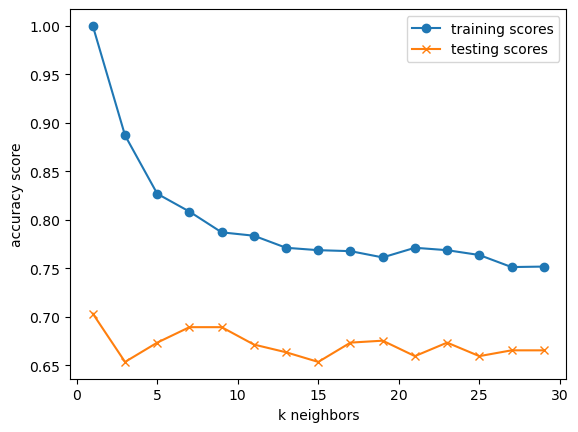

In [53]:
# Create empty lists to hold train and test scores
train_scores = []
test_scores = []
# Loop for k from 1 to 30 (odd numbers)
for k in range(1, 30, 2):
    # Create model object
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit model
    knn.fit(X_train, y_train)
    # Get score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    # Add scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    # Print scores
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [54]:
# Train the KNN model with the best k value
# Note that k: 15 seems to be the best choice for this dataset
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [55]:
# Make predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [56]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.7687
Test Accuracy: 0.7059


In [57]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69       343
           1       0.47      0.85      0.61       159

    accuracy                           0.65       502
   macro avg       0.68      0.71      0.65       502
weighted avg       0.76      0.65      0.66       502



### 11.4 Decision Trees

In [58]:
# Create Decision Tree Object
dt_model = tree.DecisionTreeClassifier()

In [59]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# Make predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [61]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 1.0000
Test Accuracy: 0.8837


In [62]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       343
           1       0.83      0.85      0.84       159

    accuracy                           0.90       502
   macro avg       0.88      0.88      0.88       502
weighted avg       0.90      0.90      0.90       502



### 11.5 Random Forest Classifier

In [114]:
# Create and train a Random Forest model
rfc_model = RandomForestClassifier(n_estimators=500)
# Fit Model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [115]:
# Make predictions
y_train_pred = rfc_model.predict(X_train)
y_test_pred = rfc_model.predict(X_test)

In [116]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 1.0000
Test Accuracy: 0.9177


In [117]:
# We overfit! Lets try varying the max depth
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    # Add depth to models dictionary
    models['max_depth'].append(depth)
    # Create model object
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    # Fit Model
    model.fit(X_train, y_train)
    # Make predictions
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    # Add predictions to models dictionary
    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))
# Convert model to dataframe
models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

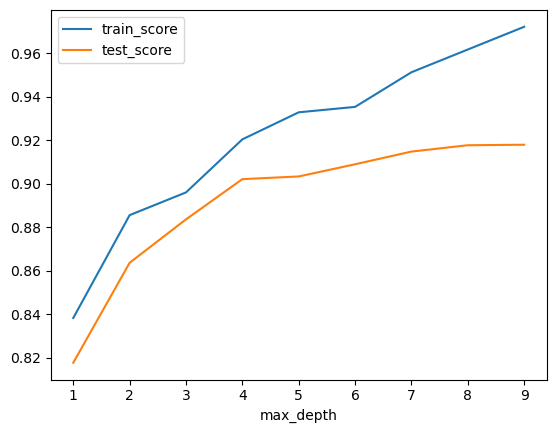

In [118]:
# Plot results
models_df.plot(x='max_depth')

In [119]:
# it looks like the lines start to diverge a lot after 8
# Create and train a RandomForest model
model = RandomForestClassifier(max_depth = 6, n_estimators=500)
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9383
Test Accuracy: 0.9182


In [120]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       343
           1       0.91      0.87      0.89       159

    accuracy                           0.93       502
   macro avg       0.93      0.92      0.92       502
weighted avg       0.93      0.93      0.93       502



* Use GridSerchCV to find the best parameters

In [121]:
# Create model
rfc_model=RandomForestClassifier(random_state=14)

In [122]:
# Create list of parameters
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
}

In [123]:
# Create GidSearchCV object
CV_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid)
# Fit the model
CV_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [124]:
# Get best parameters
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [94]:
# Create new model with the best results
rfc1=RandomForestClassifier(random_state=14, n_estimators= 200, max_depth=10)

In [95]:
# Fit the model
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=14)

In [96]:
# Make predictions
y_train_pred=rfc1.predict(X_train)
y_test_pred=rfc1.predict(X_test)

In [97]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9816
Test Accuracy: 0.9177


In [98]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       343
           1       0.94      0.86      0.90       159

    accuracy                           0.94       502
   macro avg       0.94      0.92      0.93       502
weighted avg       0.94      0.94      0.94       502



### 11.6 Extremely Random Trees

In [99]:
# Create model object
erc_model = ExtraTreesClassifier(random_state=14)

In [100]:
# Fit the model
erc_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=14)

In [101]:
# Make predictions
y_train_pred=erc_model.predict(X_train)
y_test_pred=erc_model.predict(X_test)

In [102]:
# Print predictions
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 1.0000
Test Accuracy: 0.8804


In [103]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       343
           1       0.91      0.80      0.85       159

    accuracy                           0.91       502
   macro avg       0.91      0.88      0.89       502
weighted avg       0.91      0.91      0.91       502



### 11.7 Boosting

In [104]:
# Create boosting model
gbc_model = GradientBoostingClassifier(random_state=14)

In [105]:
# Fit the model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=14)

In [106]:
# Make predictions
y_train_pred=gbc_model.predict(X_train)
y_test_pred=gbc_model.predict(X_test)

In [107]:
# Print accuracy results
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9448
Test Accuracy: 0.9121


In [108]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       343
           1       0.90      0.87      0.88       159

    accuracy                           0.93       502
   macro avg       0.92      0.91      0.92       502
weighted avg       0.93      0.93      0.93       502



In [109]:
# Create Ada Boost Model
abc_model = AdaBoostClassifier(random_state=14)

In [110]:
# Fit the model
abc_model.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=14)

In [111]:
# Make predictions
y_train_pred=abc_model.predict(X_train)
y_test_pred=abc_model.predict(X_test)

In [112]:
# Print results
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9129
Test Accuracy: 0.8955


In [113]:
# Print classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       343
           1       0.80      0.89      0.85       159

    accuracy                           0.90       502
   macro avg       0.87      0.90      0.88       502
weighted avg       0.90      0.90      0.90       502

